Epoch 1/20
45/45 [==============================] - 0s 10ms/step - loss: 2.0669 - accuracy: 0.2514 - val_loss: 1.8160 - val_accuracy: 0.3625
Epoch 2/20
45/45 [==============================] - 0s 6ms/step - loss: 1.6272 - accuracy: 0.4167 - val_loss: 1.4811 - val_accuracy: 0.4750
Epoch 3/20
45/45 [==============================] - 0s 7ms/step - loss: 1.3374 - accuracy: 0.5250 - val_loss: 1.3560 - val_accuracy: 0.5250
Epoch 4/20
45/45 [==============================] - 0s 7ms/step - loss: 1.1910 - accuracy: 0.5819 - val_loss: 1.2849 - val_accuracy: 0.5375
Epoch 5/20
45/45 [==============================] - 0s 6ms/step - loss: 1.0818 - accuracy: 0.6389 - val_loss: 1.2616 - val_accuracy: 0.5250
Epoch 6/20
45/45 [==============================] - 0s 6ms/step - loss: 0.9810 - accuracy: 0.6542 - val_loss: 1.2422 - val_accuracy: 0.5750
Epoch 7/20
45/45 [==============================] - 0s 6ms/step - loss: 0.9172 - accuracy: 0.6819 - val_loss: 1.2186 - val_accuracy: 0.5875
Epoch 8/20
45/45 [=

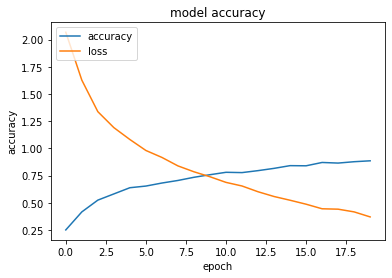

7/7 [==============================] - 0s 7ms/step - loss: 1.0069 - accuracy: 0.6950
Precision:  0.6949999928474426
Loss:  1.0069060325622559
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
 2.7718974e-21 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
['hiphop']


In [1]:
import tensorflow as tf
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

# Aplicamos label encoding
le = LabelEncoder()
dataframe = read_csv("music.csv", decimal=".", header=0)

# Sacamos columna filename
dataframe = dataframe.drop(['filename'],axis=1)

dataframe['label_encoded'] = le.fit_transform(dataframe.label.values)
dataset = dataframe.values

y = dataset[:,29]
y = y.astype('float')

# Escalamos
scaler = StandardScaler()
x = scaler.fit_transform(np.array(dataset[:,0:28], dtype = float))
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Definiendo capas
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu',input_shape=(x.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilando el modelo usando sparse_categorical_crossentropy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenando el modelo
history = model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=16, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

# Calculando precision
test_loss, test_acc = model.evaluate(X_test,y_test)
print('Precision: ',test_acc)
print('Loss: ',test_loss)

predictions = model.predict([[
    #75.99954044117646,36,0.36009822628482896,0.042994871735572815,2209.3575882230853,2175.214294000424,4575.588998705979,0.10714712231520898,-245.16092117015035,95.08981269305337,-21.228013506266056,45.65872902173932,-3.5566673733459306,14.9762830835408,-20.659519139391033,19.52980375665746,-21.70156802296772,7.328369062785972,-9.282355834332096,0.8137770466166355,-13.018359496103816,0.05316795902659675,-8.232850899248907,1.0592552969780418,-8.031863860618266,-0.397097235774776,-4.349921223709898,-4.2209984809933285
    #95.703125,46,0.4877998814503983,0.11614155024290085,3274.342156991105,2722.3163670049926,6407.227923035991,0.18307976973684212,-52.90148817646655,50.085774646816695,-11.487130973752759,46.349911990602465,6.551362817902274,10.126185338730286,5.481246308712581,8.855128250106809,5.941896337420545,6.623277886102606,-4.045888976060304,9.771427418343473,-3.1174026472784275,3.6594034926642833,-6.507283766560518,1.087841324406413,-4.4854009691882695,4.725540944212019,-2.7550316266216197,0.5059655990000068
    #103.359375,50,0.43100672150936925,0.21753869950771332,2908.1968535778014,2286.2651502532444,5405.600646405766,0.17811948227070434,-1.897967659682762,72.69534594304645,-32.789185904363634,63.594064206722884,-18.557204046331094,25.87533627571895,-13.852797493823084,18.06568877817787,-11.946759738008776,19.658658143941985,-13.961671290844595,18.73877135001885,-11.190245779874083,7.954804871854143,-10.284151490596225,5.3095516499967355,-9.027448434747395,4.316595886333592,-5.642725106783399,8.726417155444501
    134.99917763157896,67,0.2699707775143556,0.06138831749558449,1874.0449612101097,2569.4165774820995,4292.274045206076,0.054154245476973686,-217.62505057924574,105.63002638836623,19.322129684696115,28.36112648663063,8.659345247605602,0.1469453918183853,6.374991903312682,-2.5322536033675274,-12.992277309589646,-11.149885735706464,-6.155870606430358,-7.740072254698197,0.41686481415582055,-1.2626062828585447,1.7110636845230012,-2.3008674975485306,-3.8058531695811593,-3.6798015750947743,0.5762074702854731,0.5685017530857746
]])

print(predictions[0])
#print(np.argmax(predictions[0]))
print(le.inverse_transform([np.argmax(predictions[0])]))
